# Setting

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lettura dataset

age: The person’s age in years

sex: The person’s sex (1 = male, 0 = female)

cp: chest pain type
— Value 0: asymptomatic
— Value 1: atypical angina
— Value 2: non-anginal pain
— Value 3: typical angina

trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)

chol: The person’s cholesterol measurement in mg/dl

fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: resting electrocardiographic results
- Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
- Value 1: normal
- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

thalach: The person’s maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping
- 0: downsloping;
- 1: flat;
- 2: upsloping

ca: The number of major vessels (0–3)

thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
- Value 1: fixed defect (no blood flow in some part of the heart)
- Value 2: normal blood flow
- Value 3: reversible defect (a blood flow is observed but it is not normal)

- target: Heart disease (1 = no, 0= yes)

In [28]:
df = pd.read_csv("data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Esplorazione

In [29]:
df.shape

(303, 14)

In [30]:
df.dtypes

# Out of 14 features, we have 13 int types and only one with the float data types.

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [31]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [32]:
sum(df.duplicated())

# analizzare duplicato

1

In [33]:
df.isnull().sum()

# controllo presenza na

feature_names = pd.Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])
for col in feature_names:
    c = train[col].isna().sum()
    print("Column %s has %d N/A." % (col, c))

# non ci sono valori nulli
# Woah! Fortunately, this dataset doesn’t hold any missing values.

NameError: name 'train' is not defined

In [ ]:
df.hist(figsize=(15,18))
plt.show()

In [ ]:
# Calcolo della correlazione
df.corr()


# Visualizzazione della correlazione
sns.heatmap(df.corr())

f, ax = plt.subplots(figsize=(20,15))

sns.heatmap(df.corr(), annot=True);

In [ ]:
# correlazione variabili con la variabile target
sns.set_context('notebook',font_scale = 2.3)
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 10),
                                                        title="Correlation with the target feature")
plt.tight_layout()

In [ ]:
sns.boxplot(x='sex',y='age',hue='target',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# e simili
# https://medium.com/swlh/the-framingham-heart-study-decision-trees-83a7fb62718e

In [ ]:
# Checking for outliers
df.describe()
sns.pairplot(df)

# Preprocessing

## Gestione feature

In [34]:
# gestione fetaure

# eliminazione feature errate
df = df[df['ca'] < 4] #drop the wrong ca values
df = df[df['thal'] > 0] # drop the wong thal value

# eliminazione duplicati
df = df.drop_duplicates()


# rendere categoriche o variabili dummy alcune variabili
# While most machine learning algorithms only work with numeric values, many important real-world features are not numeric but rather categorical. As categorical features, they take on levels or values. These can be represented as various categories such as age, state, or customer type for example
# Most machine learning algorithms cannot handle categorical variables unless we convert them to numerical values
# Machine learning algorithms cannot process categorical or text data unless they have been converted to numbers. One hot encoding maps categorical values to integer values, which are represented as a binary vector that are all zero values, except the index of the integer, which is set to 1.
# Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.
# a = pd.get_dummies(df['cp'], prefix = "cp")
# b = pd.get_dummies(df['thal'], prefix = "thal")
# c = pd.get_dummies(df['slope'], prefix = "slope")
# e poi elimino: df = df.drop(columns = ['cp', 'thal', 'slope'])



# dummies e scaler insieme - e poi divido in train e test
# https://towardsdatascience.com/predicting-presence-of-heart-diseases-using-machine-learning-36f00f3edb2c#:~:text=Machine%20Learning%20can%20play%20an,and%20treatment%20per%20patient%20basis.
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Divisione in train e test

In [35]:
# divisione train test
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:13] # Features
y = df.iloc[:,13] # Target variable

# X = pd.get_dummies(X, columns=X.columns)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

[0 1]


Counter({0: 93, 1: 114})

## Standardizzaione

In [ ]:
from sklearn.preprocessing import StandardScaler
# scaler che applico sia sul train che sul test   ----- solo variabili continue
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# da scalare sarebbero: https://machinemantra.in/heart-disease-prediction-in-python/
# ovviamente per il test che è 0 o 1 non bisogna scalare

## Gestione class imbalance

[0 1]
Class 0: 136
Class 1: 160
Proportion: 0.85 : 1


/Users/lorenzolorgna/.conda/envs/fisica/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


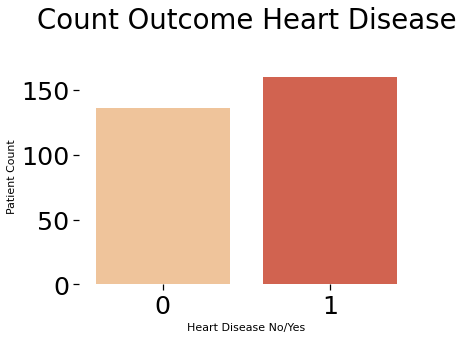

In [40]:
# gestione class imbalance    ---- neanche cosi male

from collections import Counter
print(y_test.unique())
Counter(y_train)


# Checking balance of outcome variable
target_count = df.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(df.target, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

# Implementazione modello

In [ ]:
# potrei valutare feature importance

[0.07303897 0.05623021 0.12507392 0.06681875 0.05917023 0.02013374
 0.03215717 0.08420638 0.10477206 0.09018052 0.06721991 0.12449121
 0.09650695]


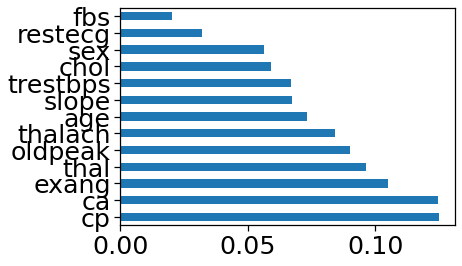

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [ ]:
# decision tree/boosted decison tree

In [ ]:
# random forest

In [17]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[30 11]
 [ 7 43]]


Accuracy of Logistic Regression: 80.21978021978022 

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        41
           1       0.80      0.86      0.83        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



/Users/lorenzolorgna/.conda/envs/fisica/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# provo diversi modelli e confronto